In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 100,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9567901234567902, Loss: 0.32266072873716
Checkpoint 200, Accuracy: 0.9629629629629629, Loss: 0.290971455750642
Checkpoint 300, Accuracy: 0.9629629629629629, Loss: 0.262207861299868
Checkpoint 400, Accuracy: 0.9629629629629629, Loss: 0.23916746068883826
Checkpoint 500, Accuracy: 0.9629629629629629, Loss: 0.21781345650001807


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.44004497 0.54802245 0.01193261]
[1. 0. 0.] <-> [0.8999508  0.02228874 0.07776045]
[0. 1. 0.] <-> [0.24885194 0.74193054 0.00921758]
[1. 0. 0.] <-> [0.83291453 0.15189262 0.01519284]
[1. 0. 0.] <-> [0.92820066 0.02755932 0.04423998]
[1. 0. 0.] <-> [0.85144323 0.13302872 0.01552807]
[1. 0. 0.] <-> [0.8817341  0.1078318  0.01043415]
[0. 0. 1.] <-> [0.20138617 0.00377552 0.79483837]
[1. 0. 0.] <-> [0.94253904 0.0464442  0.01101678]
[1. 0. 0.] <-> [0.921322   0.03976609 0.03891191]
[1. 0. 0.] <-> [0.8499264  0.01813309 0.13194048]
[1. 0. 0.] <-> [0.8702804  0.02417985 0.10553981]
[1. 0. 0.] <-> [0.93389875 0.05428658 0.01181475]
[1. 0. 0.] <-> [0.41991702 0.0057149  0.57436806]
[1. 0. 0.] <-> [0.8815933  0.01889485 0.09951182]
[1. 0. 0.] <-> [0.7126021  0.27215242 0.01524539]
[0. 1. 0.] <-> [0.18792157 0.8043967  0.00768176]
[1. 0. 0.] <-> [0.88886356 0.07628019 0.03485624]
[1. 0. 0.] <-> [0.9405638  0.02090275 0.03853355]
[1. 0. 0.] <-> [0.9362967  0.04113073 0.02257254]


In [12]:
# Testing Performance

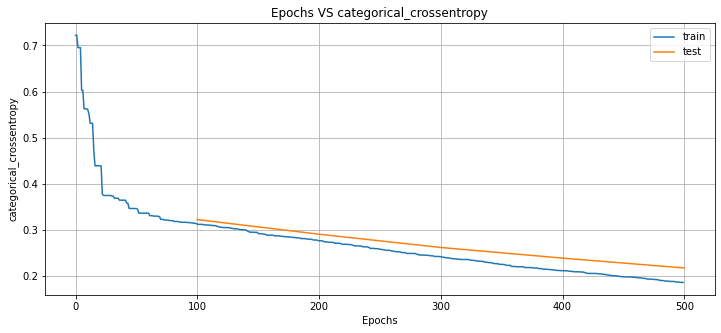

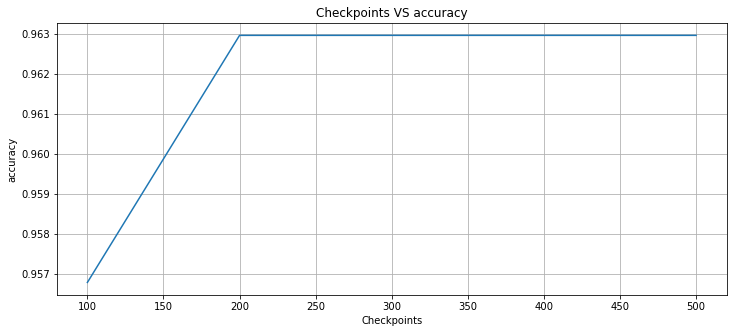

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9567901234567902, 'mean_square_error': 0.17672480191971, 'categorical_crossentropy': 0.32266072873716, 'precision': 0.9351851851851852, 'recall': 0.9351851851851852, 'f1': 0.9351851851851852, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 7, 'tn_hit': 25, 'fn_hit': 0}, 1: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 4}, 2: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 3}}, 'checkpoint': 100} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.1510257167784543, 'categorical_crossentropy': 0.290971455750642, 'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1': 0.9444444444444444, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 6, 'tn_hit': 26, 'fn_hit': 0}, 1: {'tp_hit': 14, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 3}, 2: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.1257840906941461, 'categorical_crossentropy': 0.262207861299868, 'precision': 0.944

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-1.776078    1.7918009  -1.388253   -2.0266104  -0.69417185]
 bias: 1.859320044517517

Neuron 1: weights:
[-1.5451759  2.8759308  1.203403  -1.24891   -2.6640985]
 bias: 2.2684454917907715

Neuron 2: weights:
[-0.6217478   2.27088     2.9882548   0.28502122 -1.6133094 ]
 bias: -2.020721197128296

Neuron 3: weights:
[-2.5481443   1.1381567   0.7380282   0.77479625 -1.5104568 ]
 bias: 0.17969141900539398

$
Layer 2
Neuron 0: weights:
[ 0.34867275  1.2395892  -1.1128436  -1.8962129 ]
 bias: 0.9818120002746582

Neuron 1: weights:
[-0.5879866   2.1822507   2.679217   -0.25845388]
 bias: -2.9999301433563232

Neuron 2: weights:
[-2.0890765  -2.9949543  -0.06383463 -0.8486452 ]
 bias: 2.360332489013672

$

